In [1]:
from IOHMM import IOHMM_model
import numpy as np, pandas as pd
import torch
import matplotlib.pyplot as plt

torch.Size([158, 2])
torch.Size([158])
tensor([[2.0000e+00, 1.0000e+00],
        [1.9950e+00, 9.9500e-01],
        [1.9801e+00, 9.8506e-01],
        [1.9553e+00, 9.7527e-01],
        [1.9211e+00, 9.6572e-01],
        [1.8776e+00, 9.5652e-01],
        [1.8253e+00, 9.4775e-01],
        [1.7648e+00, 9.3951e-01],
        [1.6967e+00, 9.3186e-01],
        [1.6216e+00, 9.2490e-01],
        [1.5403e+00, 9.1869e-01],
        [1.4536e+00, 9.1329e-01],
        [1.3624e+00, 9.0876e-01],
        [1.2675e+00, 9.0514e-01],
        [1.1700e+00, 9.0247e-01],
        [1.0707e+00, 9.0077e-01],
        [9.7080e-01, 9.0006e-01],
        [8.7116e-01, 9.0036e-01],
        [7.7280e-01, 9.0164e-01],
        [6.7671e-01, 9.0391e-01],
        [5.8385e-01, 9.0714e-01],
        [4.9515e-01, 9.1130e-01],
        [4.1150e-01, 9.1635e-01],
        [3.3372e-01, 9.2223e-01],
        [2.6261e-01, 9.2888e-01],
        [1.9886e-01, 9.3625e-01],
        [1.4311e-01, 9.4425e-01],
        [9.5928e-02, 9.5282e-01],
        [

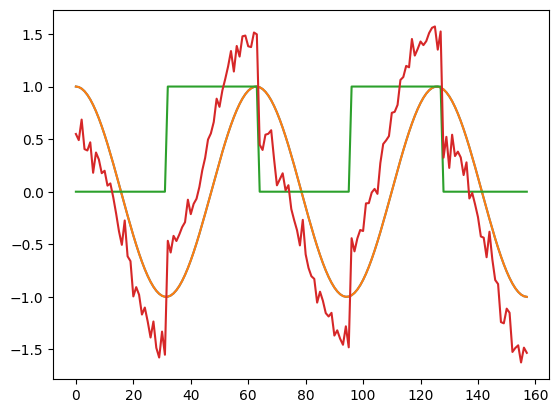

In [2]:
x=np.arange(np.pi/2 , 11*np.pi/2, 0.1)
x=np.sin(x)
plt.plot(x)
interval = len(np.arange(np.pi/2 , 3*np.pi/2, 0.1))
hidden_states = np.zeros_like(x)

for j in range(interval,len(x)-interval ,2*interval):
    for i in range(interval):
        hidden_states[j+i] = 1


x=torch.tensor(x, dtype=torch.float32)
x_shift = torch.cat((torch.tensor([1.0]), x[:-1]))
inputs_diff = x - x_shift

y = np.zeros_like(x)

for i,t in enumerate(x):
    if hidden_states[i]==0:
        y[i] = x[i] - np.random.normal(0.5,0.1) - inputs_diff[i].item()
    else:
        y[i] = x[i] + np.random.normal(0.5,0.1) + inputs_diff[i].item()

plt.plot(x)
plt.plot(hidden_states)
plt.plot(y)

outputs=torch.tensor(y, dtype=torch.float32)

input = torch.vstack((x, inputs_diff)).T

input += torch.ones_like(input)
outputs += torch.ones_like(outputs)

print(input.shape)
print(outputs.shape)
print(input)

In [3]:
transition_matrix = torch.tensor([[[1.,0.1,-1.],[1.,0.1,1.]],[[1.,0.1,1.0],[1.,0.1,-1.0]]])
emission_matrix = torch.tensor([[-0.5,1.0,-1.0],[0.5,1.0,1.0]])

IOHMM = IOHMM_model(num_states=2, inputs=input, outputs=outputs, max_iter=1000, tol=1e-4, transition_matrix=transition_matrix, emission_matrix=emission_matrix)
print(f"initial pi {IOHMM.initial_pi}")
print(IOHMM.transition_matrix)
print(IOHMM.emission_matrix)
print(IOHMM.lsd)

initial pi Parameter containing:
tensor([-0.6931, -0.6931], requires_grad=True)
Parameter containing:
tensor([[[ 1.0000,  0.1000, -1.0000],
         [ 1.0000,  0.1000,  1.0000]],

        [[ 1.0000,  0.1000,  1.0000],
         [ 1.0000,  0.1000, -1.0000]]], requires_grad=True)
Parameter containing:
tensor([[-0.5000,  1.0000, -1.0000],
        [ 0.5000,  1.0000,  1.0000]], requires_grad=True)
Parameter containing:
tensor([1.6094, 1.6094], requires_grad=True)


In [4]:
IOHMM._forward()

tensor([[-0.6665, -0.7206],
        [-0.6836, -0.7028],
        [-0.6830, -0.7034],
        [-0.6687, -0.7183],
        [-0.6807, -0.7057],
        [-0.6788, -0.7077],
        [-0.6668, -0.7202],
        [-0.6902, -0.6961],
        [-0.6732, -0.7135],
        [-0.6825, -0.7039],
        [-0.6816, -0.7048],
        [-0.6793, -0.7072],
        [-0.6873, -0.6991],
        [-0.6795, -0.7070],
        [-0.6819, -0.7045],
        [-0.6763, -0.7103],
        [-0.6787, -0.7078],
        [-0.6954, -0.6909],
        [-0.6701, -0.7168],
        [-0.6910, -0.6953],
        [-0.6625, -0.7247],
        [-0.6928, -0.6934],
        [-0.6714, -0.7153],
        [-0.6806, -0.7058],
        [-0.6816, -0.7048],
        [-0.6769, -0.7096],
        [-0.6748, -0.7119],
        [-0.6877, -0.6986],
        [-0.6659, -0.7212],
        [-0.6783, -0.7082],
        [-0.6843, -0.7021],
        [-0.6674, -0.7196],
        [-0.7463, -0.6427],
        [-0.6783, -0.7082],
        [-0.7389, -0.6494],
        [-0.6872, -0

In [5]:
IOHMM._baum_welch()

Iteration 1, likelihood: -inf
Iteration 2, likelihood: -535.8741455078125
Iteration 3, likelihood: -85448.234375
Iteration 4, likelihood: -643367.375
Iteration 5, likelihood: -739485.75
Iteration 6, likelihood: -391.5577087402344
Iteration 7, likelihood: -386.5577087402344
Iteration 8, likelihood: -381.5577392578125
Iteration 9, likelihood: -376.5577392578125
Iteration 10, likelihood: -371.5577087402344
Iteration 11, likelihood: -366.5577087402344
Iteration 12, likelihood: -361.6076965332031
Iteration 13, likelihood: -356.65771484375
Iteration 14, likelihood: -351.7076721191406
Iteration 15, likelihood: -346.7576904296875
Iteration 16, likelihood: -341.8077087402344
Iteration 17, likelihood: -336.857666015625
Iteration 18, likelihood: -331.90765380859375
Iteration 19, likelihood: -326.9576416015625


KeyboardInterrupt: 

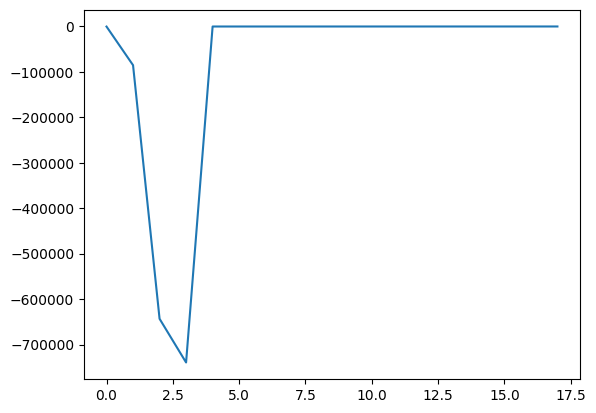

In [6]:
plt.plot(IOHMM.history)

In [7]:
print("Initial pi")
print(IOHMM.initial_pi) # to normalize
print("Transition matrix")
print(IOHMM.transition_matrix)
print("Emission matrix")
print(IOHMM.emission_matrix)
print("Sd")
print(IOHMM.lsd)

Initial pi
Parameter containing:
tensor([80.2129,  8.0008], requires_grad=True)
Transition matrix
Parameter containing:
tensor([[[-675.4161, -698.0093, -668.2976],
         [ 677.4161,  698.2092,  668.2976]],

        [[ 780.5662,  798.0027,  770.7664],
         [-778.5663, -797.8029, -770.7665]]], requires_grad=True)
Emission matrix
Parameter containing:
tensor([[-0.5000,  1.0000, -1.0000],
        [ 0.5000,  1.0000,  1.0000]], requires_grad=True)
Sd
Parameter containing:
tensor([1.6094, 1.6094], requires_grad=True)


In [8]:
print(input[100])
print(IOHMM.predict(input[100]))
print(outputs[100])


tensor([0.1609, 1.0501])
tensor([   0.0000, -538.5124])
tensor([-765.3266,  226.8142])
tensor([-1.3892,  1.7110], grad_fn=<MvBackward0>)
tensor(inf, grad_fn=<SumBackward0>)
tensor(0.6261)


In [9]:
IOHMM.viterbi()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0]